# Dimensionality Reduction (PCA) and Applying Clustering (K-Means)

### Objective:
 - To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### About organization:
 - HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem Statement:
 - HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.
 
 ***Kaggle link***:
 https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load datasets
data = pd.read_csv('data/Country-data.csv')

*Dataset null value, duplicate etc. check was already done on the K-Means notebook.*

In [4]:
# remove categorical feature column "Country"
data = data.drop('country', axis=1)

In [5]:
# To use scaled data for clustering purposes, let's standardize our data
sc = StandardScaler()
scaled_data = sc.fit_transform(data)

## Principal Component Analysis

In [6]:
# PCA object
pca = PCA(svd_solver='auto') # singular value decomposition solver "auto" to get the no. of pcs. Can also use solver "randomized" introducing a random state seed like "42"
# fit on data
pca.fit(scaled_data)

PCA()

In [7]:
# total no. of principal components
pca.n_components_

9

In [8]:
# principal components of each feature
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

### Principle component Variance Ratio

In [9]:
# Variance explained from each principal component
var_ratio = pca.explained_variance_ratio_
var_ratio

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Text(0, 0.5, 'Explained Variance Ratio')

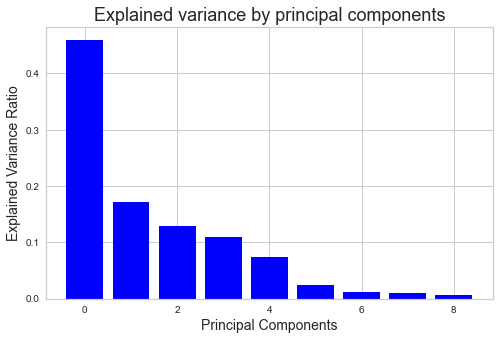

In [10]:
# Plot explained variance ratio for each principal component
plt.figure(figsize=(8,5))
plt.bar([pc for pc, _ in enumerate(var_ratio)], var_ratio, color='blue')
plt.title('Explained variance by principal components', fontsize = 18)
plt.xlabel('Principal Components', fontsize = 14)
plt.ylabel('Explained Variance Ratio',fontsize = 14)

#### First & Second PCs explain around 46% and 17% variance respectively.

### Cumulative Variance

In [11]:
# cumulative variance explained by each PC
cum_var = np.cumsum(var_ratio*100)
cum_var

array([ 45.95173979,  63.13336544,  76.13762433,  87.19078614,
        94.53099756,  97.01523224,  98.27566264,  99.25694438,
       100.        ])

Text(0, 0.5, 'Cumulative Variance (%)')

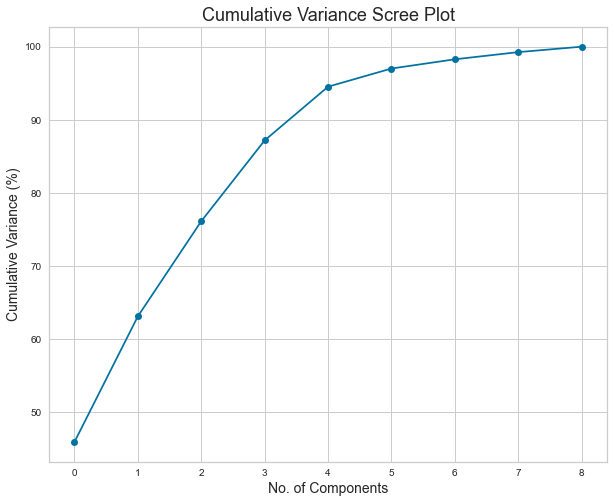

In [12]:
# Plot cumulative variance explained by each PC
plt.figure(figsize=(10,8))
plt.plot(cum_var, marker='o')
plt.title('Cumulative Variance Scree Plot', fontsize = 18)
plt.xlabel('No. of Components', fontsize = 14)
plt.ylabel('Cumulative Variance (%)',fontsize = 14)

#### Notice from the scree plot, the first 4 principal components explains more than 90% of the variance. Less information is stored from 5th principal component onwards.

## 1) PCA can be used as a data pre-processing tool

### Principal Component Data Decomposition

In [13]:
#Principal Component Data Decomposition

# Column names of df to be created with PC data
pc_data_colnames = []
# list with PC values of each feature
component_data = []

# iterate over total pca components
for component in range(pca.n_components_):
    # slice values by PC, convert to list format and add to component_data list
    component_data.append(pca.components_[:,component].tolist())
    # Add column names -> corresponding PC number to pc_data_colnames
    pc_data_colnames.append('PC{}'.format(component+1))

# create dataframe
n_pca_data = pd.DataFrame(component_data, columns=pc_data_colnames)
# add all feature names
n_pca_data['Features'] = list(data.columns)

n_pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Features
0,-0.419519,0.192884,-0.029544,0.370653,-0.168970,0.200628,-0.079489,-0.682743,0.327542,child_mort
1,0.283897,0.613163,0.144761,0.003091,0.057616,-0.059333,-0.707303,-0.014197,-0.123082,exports
2,0.150838,-0.243087,-0.596632,0.461897,0.518000,0.007276,-0.249831,0.072497,0.113088,health
3,0.161482,0.671821,-0.299927,-0.071907,0.255376,-0.030032,0.592190,-0.028946,0.099037,imports
4,0.398441,0.022536,0.301548,0.392159,-0.247150,0.160347,0.095562,0.352624,0.612982,income
5,-0.193173,-0.008404,0.642520,0.150442,0.714869,0.066285,0.104633,-0.011538,-0.025236,inflation
6,0.425839,-0.222707,0.113919,-0.203797,0.108220,-0.601127,0.018486,-0.504664,0.294040,life_expec
7,-0.403729,0.155233,0.019549,0.378304,-0.135262,-0.750689,0.028826,0.293353,-0.026336,total_fer
8,0.392645,-0.046022,0.122977,0.531995,-0.180167,0.016779,0.242998,-0.249696,-0.625646,gdpp


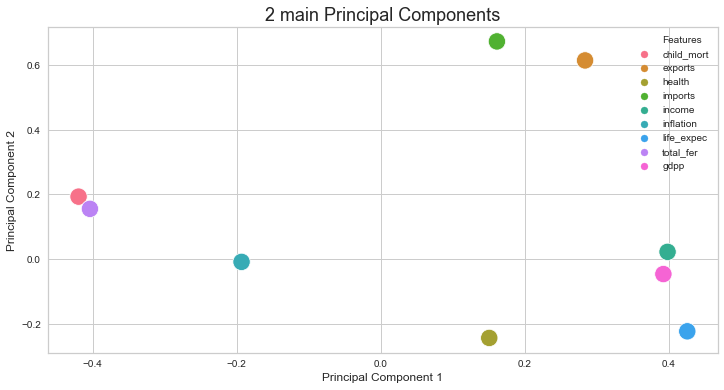

In [15]:
# Visualize PC1 and PC2
fig = plt.figure(figsize = (12,6))
sns.scatterplot(n_pca_data.PC1, n_pca_data.PC2, hue=n_pca_data.Features, marker='o', s=300)
plt.title('2 main Principal Components',fontsize=18)
plt.xlabel('Principal Component 1',fontsize=12)
plt.ylabel('Principal Component 2',fontsize=12)
plt.show()

#### We can see that 1st Principal Component (X-axis) is gravitated mainly towards features like: life expectancy, gdpp, income. 2nd Principal Component (Y-axis) is gravitated predominantly towards features like: imports, exports.

## 2) PCA with K-Means for clustering

### PCA for 2 principal components

In [16]:
# PCA for 2 PC
pca_ = PCA(n_components=2)
# fit and transform on data
pca_data = pca_.fit_transform(scaled_data)

# store pca_data to a data frame
pca_dataset = pd.DataFrame(data = pca_data, columns = ['principal component 1', 'principal component 2'])

### Plot 2 PCs

Text(0, 0.5, 'Principal Component 2')

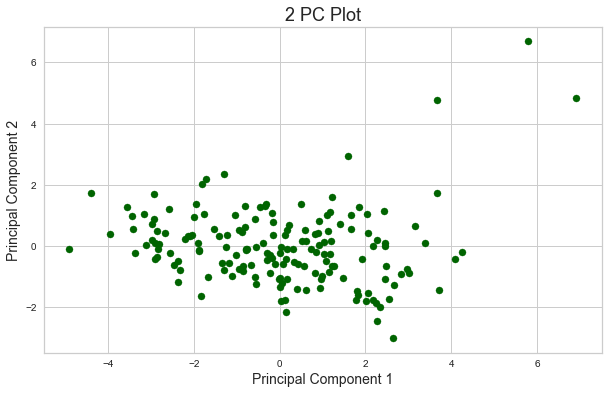

In [17]:
plt.figure(figsize=(10,6))
# plot the figure
plt.scatter(pca_dataset['principal component 1'], pca_dataset['principal component 2'], c='darkgreen', s = 50)
plt.title('2 PC Plot', fontsize = 18)
plt.xlabel('Principal Component 1', fontsize = 14)
plt.ylabel('Principal Component 2', fontsize = 14)

### Apply K-Means on this pca_data

In [18]:
# Get ELbow curve to determine optimum no. of clusters

wcss = [] # within cluster sum of squares
sil_scores = {} # Silhouette Coefficients for no. of clusters

for cluster in range(1,11): # since Silhouette Coefficient calcualtion include inter-cluster distance, minimum number of clusters is 2
    # define kmeans model
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    # fit data to k-means model
    kmeans.fit(pca_dataset)
    # inertia method returns wcss for the given model
    wcss.append(kmeans.inertia_)
    # since Silhouette Coefficient calcualtion include inter-cluster distance, minimum number of clusters is 2
    if cluster > 1:
        # add silhouette score to dict
        sil_scores[cluster] = silhouette_score(pca_dataset, kmeans.labels_)

### Plot WCSS with No. of Clusters

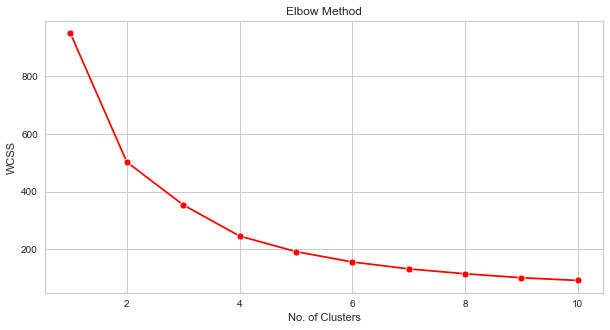

In [19]:
# lets plot wcss vs no. of clusters
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss, marker='o', color='red')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Optimum no. of clusters seems to be 3. Lets validate through silhouette scores.

### Plot Silhouette Scores with No. of Clusters

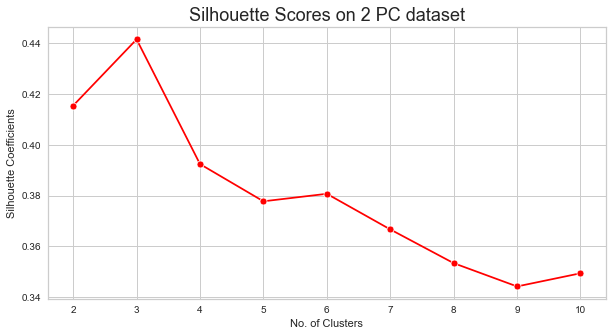

In [20]:
# Plot Silhouette Scores with No. of Clusters
plt.figure(figsize=(10,5))
sns.lineplot(list(sil_scores.keys()), list(sil_scores.values()), marker='o', color='red')
plt.title('Silhouette Scores on 2 PC dataset', fontsize = 18)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Coefficients')
plt.show()

 - **Clusters 2, 3 & 4 seems to be ahead of the pack with greater Silhouette Scores.**
 - Let's Evaluate these 2,3,4 clusters through silouette plots

### Sillouette plots for n clusters

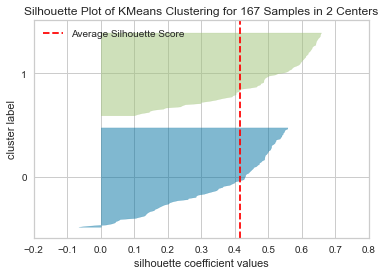

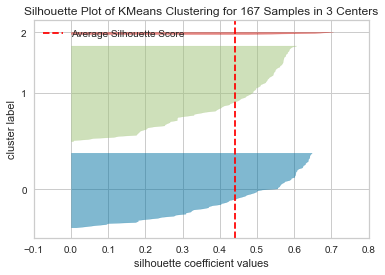

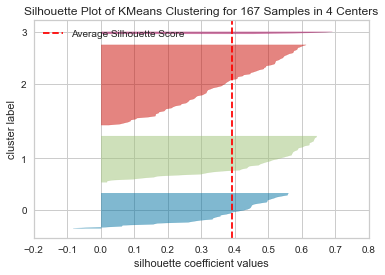

In [21]:
# for clusters with high sil. scores from Silhouette Score plot
clusters = [2,3,4]

for cluster in clusters:
    # define kmeans model
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    # fit the data to model
    visualizer.fit(pca_dataset)
    # show the chart
    visualizer.poof()

### Visualize clusters on PCA data

In [22]:
# let's fit and predict the scaled data on the model to get cluster labels
opt_clusters = 3
opt_kmeans = KMeans(n_clusters=opt_clusters, init='k-means++', random_state=42)
cluster_labels = opt_kmeans.fit_predict(pca_dataset)

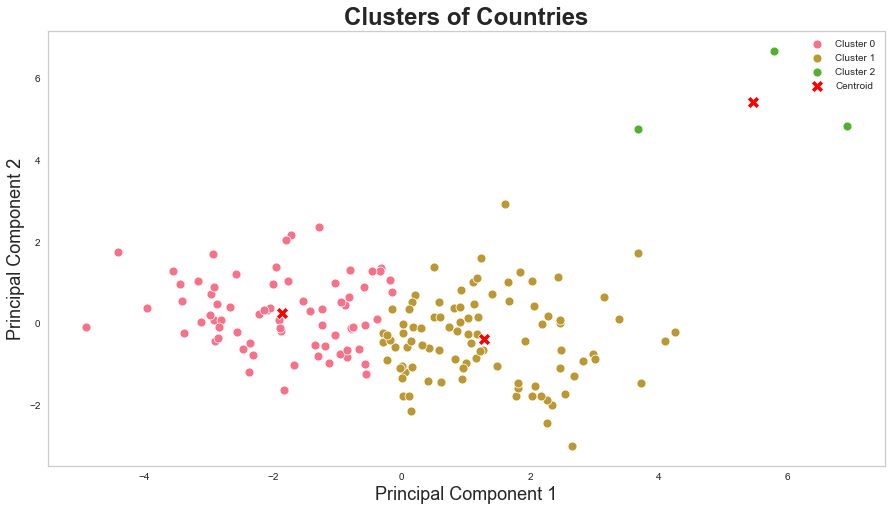

In [23]:
plt.figure(figsize=(15,8))
sns.set_palette(sns.color_palette("husl")) # color_pallete
# data points
for c in range(opt_clusters):
    sns.scatterplot(pca_data[cluster_labels == c, 0], pca_data[cluster_labels == c, 1], label='Cluster %s'%c, s=80)
    
# cluster centroids
sns.scatterplot(opt_kmeans.cluster_centers_[:, 0], opt_kmeans.cluster_centers_[:, 1], color='red', label='Centroid', s=150, marker='X')

plt.grid(False)
plt.title('Clusters of Countries', fontsize=24, fontweight="bold")
plt.xlabel('Principal Component 1', fontsize=18)
plt.ylabel('Principal Component 2', fontsize=18)
plt.legend()
plt.show()